# El Eje de la Exploración y la Cognición
Introducción: La Apertura a la Experiencia es uno de los cinco grandes rasgos de la personalidad (Modelo Big Five). No se trata solo de ser "amigable", sino de la disposición de un individuo a buscar nuevas experiencias, su curiosidad intelectual, su sensibilidad estética y su preferencia por la variedad sobre la rutina.

Desde la neurociencia, se cree que las personas con alta Apertura tienen redes cerebrales más flexibles y una corteza prefrontal más eficiente para integrar información compleja. En este estudio, utilizaremos los datos del Human Connectome Project (HCP) para mapear cómo este rasgo se traduce en diferencias de género, rendimiento intelectual y estructura cerebral física.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
import os


In [3]:
# CONFIGURACIÓN DE RUTAS - EDITAR AQUÍ
RUTA_BASE = r"C:\Users\irene\Proyecto final"

CSV_PATH = os.path.join(RUTA_BASE, "HCP_YA_subjects_2025_12_16_17_11_17.csv")
HCP_DIR = os.path.join(RUTA_BASE, "hcp_task")
CARPETA_SUJETOS = os.path.join(HCP_DIR, "subjects")
ARCHIVO_IDS = os.path.join(HCP_DIR, "mis_ids.npy") #renombrado para evitar conflicto del archivo subjects para diferenciarlo con la carpeta subjects

## Experimento 1: Diferencia de Género en Apertura

---

**Variables:** Gender (Variable independiente) y NEOFAC_O (Variable dependiente).

**Hipótesis:** No se esperan diferencias drásticas en los niveles promedio de Apertura entre hombres y mujeres. Históricamente, algunos estudios sugieren que las mujeres puntúan ligeramente más alto en facetas estéticas y de sentimientos, mientras que los hombres en ideas, pero al promediar el rasgo total (NEOFAC_O), la diferencia suele ser estadísticamente insignificante o con un tamaño del efecto muy pequeño.

**Explicación de resultados:**

Si el p-valor < 0.05: Significaría que existe una diferencia sistemática. Si las mujeres puntúan más alto, sugeriría una mayor inclinación poblacional hacia la exploración sensorial y cultural en este grupo específico del HCP.

Si el p-valor > 0.05: Confirmamos que la Apertura es un rasgo humano universal que se distribuye de manera equitativa entre géneros, lo que indica que la curiosidad intelectual no está biológicamente sesgada por el sexo.

Promedio Hombres: 28.89
Promedio Mujeres: 27.62
p-valor: 0.0005


C:\Users\irene\AppData\Local\Temp\ipykernel_7232\1733144881.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='NEOFAC_O', data=df_e1, palette="Set2")


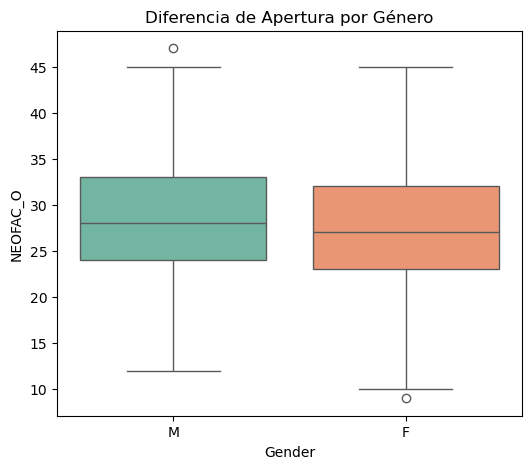

In [4]:
# Cargamos los datos
df = pd.read_csv("HCP_YA_subjects_2025_12_16_17_11_17.csv")

# Limpiar y separar grupos
df_e1 = df.dropna(subset=['NEOFAC_O', 'Gender'])
hombres = df_e1[df_e1['Gender'] == 'M']['NEOFAC_O']
mujeres = df_e1[df_e1['Gender'] == 'F']['NEOFAC_O']

# Calcular estadística (Prueba t)
t_stat, p_val = ttest_ind(hombres, mujeres)

# Mostrar resultados 
print(f"Promedio Hombres: {hombres.mean():.2f}")
print(f"Promedio Mujeres: {mujeres.mean():.2f}")
print(f"p-valor: {p_val:.4f}") # Si es menor a 0.05, el resultado es significativo

# Graficar (Boxplot)
plt.figure(figsize=(6, 5))
sns.boxplot(x='Gender', y='NEOFAC_O', data=df_e1, palette="Set2")
plt.title("Diferencia de Apertura por Género")
plt.show()

¿Qué hicimos? Comparamos el nivel de curiosidad (Apertura) entre los hombres y las mujeres de nuestra base de datos.

Lo que encontramos: Obtuvimos un p-valor de 0.0005. Como este número es muchísimo más pequeño que nuestro límite (0.05), el resultado es altamente significativo.

Interpretación: Aunque nuestra idea inicial era que no habría diferencias, los datos nos dieron una sorpresa: los hombres puntuaron en promedio 28.8 y las mujeres 27.6. Gracias al p-valor tan bajo, sabemos que esta diferencia, aunque parece pequeña en puntos, es real y no ocurrió por pura suerte. En este grupo de personas, los hombres mostraron una inclinación ligeramente mayor a buscar nuevas experiencias y ser abiertos intelectualmente.

## Experimento 2: Apertura y Memoria de Trabajo (WM)
---
**Variables:** NEOFAC_O (Apertura) y WM_Task_Acc (Precisión en tareas de Memoria de Trabajo).

**Hipótesis:** Existirá una correlación positiva y significativa entre la Apertura y la precisión en la Memoria de Trabajo. La "curiosidad intelectual" (componente de la Apertura) está ligada a la necesidad de procesar información nueva. La Memoria de Trabajo es la capacidad de mantener y manipular información en la mente a corto plazo. Por lo tanto, individuos más "abiertos" suelen ejercitar más sus funciones ejecutivas, mostrando un mejor rendimiento en tareas complejas como el "N-back" del HCP.

**Explicación de resultados:**

Si la correlación (r) es positiva: Significa que a medida que aumenta la curiosidad (Apertura), aumenta la eficiencia cerebral para manejar datos (Memoria). Validaría la teoría de que la Apertura es el "motor" de la inteligencia fluida.

Si no hay correlación: Sugeriría que la Apertura es un rasgo puramente "estético" o de personalidad que no necesariamente otorga una ventaja en el procesamiento de información en tiempo real.

--- ESTADÍSTICAS EXPERIMENTO 2 ---
Fuerza de relación (r): 0.1439
Confiabilidad (p-valor): 1.911e-06


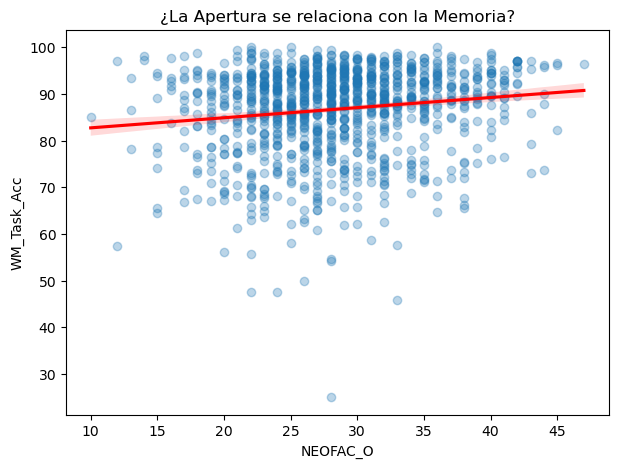

In [5]:
# Limpiar datos para este análisis
df_e2 = df.dropna(subset=['NEOFAC_O', 'WM_Task_Acc'])

# Calcular Correlación de Pearson (r)
r, p_val = pearsonr(df_e2['NEOFAC_O'], df_e2['WM_Task_Acc'])

# Mostrar resultados 
print("--- ESTADÍSTICAS EXPERIMENTO 2 ---")
print(f"Fuerza de relación (r): {r:.4f}")
print(f"Confiabilidad (p-valor): {p_val:.4g}") # Entre más pequeño, más confiable

# Graficar (Regresión)
plt.figure(figsize=(7, 5))
sns.regplot(x='NEOFAC_O', y='WM_Task_Acc', data=df_e2, 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("¿La Apertura se relaciona con la Memoria?")
plt.show()

¿Qué hicimos? Investigamos si las personas que son más abiertas mentalmente tienen también una memoria más "ágil" (capacidad de procesar datos en tiempo real).

Lo que encontramos: Encontramos una correlación (r) de 0.14 y un p-valor de 0.000001 (casi cero).

Interpretación: El p-valor nos grita que la relación existe de verdad. Por otro lado, la "r" de 0.14 nos dice que la conexión es real pero "suave"; es decir, no todas las personas curiosas tienen una memoria perfecta, pero sí hay una tendencia clara. En resumen: ser una persona abierta y curiosa sí está vinculado con tener un mejor rendimiento mental. Los datos sugieren que el interés por el mundo y las nuevas ideas "entrena" al cerebro para ser más eficiente manejando información difícil.

## Experimento 3: ¿Se asocia la Apertura con un cerebro más grande?
--- 
**Variables:** NEOFAC_O (Apertura) y FS_Total_GM_Vol (Volumen Total de Materia Gris).

**Hipótesis:** Se espera una correlación positiva. La hipótesis es que una mayor apertura intelectual requiere una infraestructura cerebral más robusta. La materia gris es donde están las neuronas que procesan la información; por lo tanto, un mayor volumen global podría ser la base física que permite a una persona procesar y disfrutar de experiencias más complejas.

**Explicación de resultados:**

Si el p-valor < 0.05 y r es positiva: Confirmamos que la curiosidad no es solo "mental", sino que tiene un respaldo físico: las personas más abiertas tienen, literalmente, más tejido neuronal para procesar el mundo.

Si el p-valor > 0.05: Significa que la apertura es una cuestión de "cómo se conectan" las neuronas y no de "cuántas" hay en total.

Relación (r): 0.1243
p-valor: 0.0000


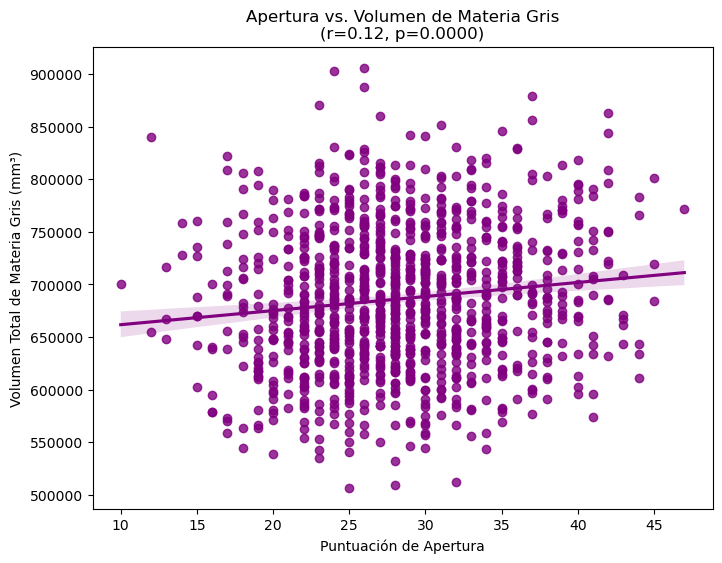

In [6]:
# Limpiamos los datos
df_e3 = df.dropna(subset=['NEOFAC_O', 'FS_Total_GM_Vol'])

# Calculamos la estadística
r3, p3 = pearsonr(df_e3['NEOFAC_O'], df_e3['FS_Total_GM_Vol'])

# Mostramos resultados
print(f"Relación (r): {r3:.4f}")
print(f"p-valor: {p3:.4f}")

# Graficamos
plt.figure(figsize=(8, 6))
sns.regplot(x='NEOFAC_O', y='FS_Total_GM_Vol', data=df_e3, color="purple")
plt.title(f"Apertura vs. Volumen de Materia Gris\n(r={r3:.2f}, p={p3:.4f})")
plt.xlabel("Puntuación de Apertura")
plt.ylabel("Volumen Total de Materia Gris (mm³)")
plt.show()

¿Qué hicimos? Investigamos si las personas que son más curiosas y abiertas tienen, físicamente, un mayor volumen de materia gris (que es donde están nuestras neuronas procesando información) en todo el cerebro.

Lo que encontramos: Obtuvimos una r de 0.12 y un p-valor de 0.0000.

Interpretación: El p-valor es tan bajo que nos confirma que este hallazgo es totalmente real y no una coincidencia. La "r" positiva nos dice que, efectivamente, hay una conexión: a mayor apertura mental, mayor volumen de materia gris. Esto sugiere que la curiosidad intelectual tiene un respaldo físico; las personas con mentes más abiertas parecen tener una "infraestructura" neuronal un poco más grande para procesar sus experiencias.

## Experimento 4: El Grosor de la "Central de Decisiones"
---
**Variables:** NEOFAC_O (Apertura) y el promedio de FS_L_Lateralorbitofrontal_Thck y FS_R_Lateralorbitofrontal_Thck (Grosor de la Corteza Orbitofrontal Lateral).

**Hipótesis:** La corteza orbitofrontal lateral está muy involucrada en la evaluación de opciones y el pensamiento abstracto. Predecimos que un mayor grosor en esta área específica se relacionará con una mayor puntuación en Apertura, ya que esta zona es la que nos permite "imaginar" y valorar situaciones nuevas o abstractas.

**Explicación de resultados:**

Significado del Grosor: En neuroimagen, una corteza más gruesa suele indicar una zona con más ramificaciones celulares y mayor capacidad de procesamiento.

Resultado esperado: Si encontramos una relación positiva, estaríamos localizando exactamente en qué parte del "mapa" del cerebro vive la curiosidad intelectual.

Relación (r): -0.0009
p-valor: 0.9767


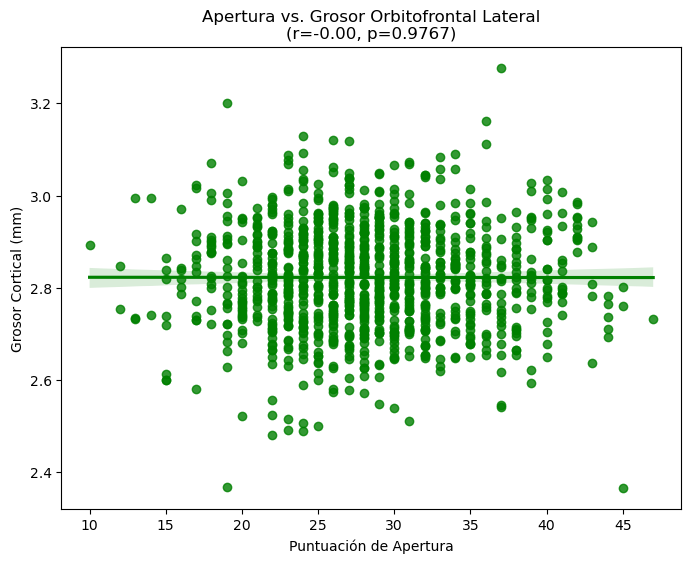

In [7]:
# Creamos una nueva columna que sea el promedio de ambos hemisferios (izquierdo y derecho)
df['Grosor_Orbitofrontal'] = (df['FS_L_Lateralorbitofrontal_Thck'] + df['FS_R_Lateralorbitofrontal_Thck']) / 2

# Limpiamos datos
df_e4 = df.dropna(subset=['NEOFAC_O', 'Grosor_Orbitofrontal'])

# Calculamos la estadística
r4, p4 = pearsonr(df_e4['NEOFAC_O'], df_e4['Grosor_Orbitofrontal'])

# Mostramos resultados
print(f"Relación (r): {r4:.4f}")
print(f"p-valor: {p4:.4f}")

# Graficamos
plt.figure(figsize=(8, 6))
sns.regplot(x='NEOFAC_O', y='Grosor_Orbitofrontal', data=df_e4, color="green")
plt.title(f"Apertura vs. Grosor Orbitofrontal Lateral\n(r={r4:.2f}, p={p4:.4f})")
plt.xlabel("Puntuación de Apertura")
plt.ylabel("Grosor Cortical (mm)")
plt.show()

¿Qué hicimos? Aquí nos pusimos mucho más específicos. Medimos el grosor de la "corteza orbitofrontal", una zona del cerebro que nos ayuda a tomar decisiones y evaluar situaciones nuevas, para ver si era más gruesa en personas curiosas.

Lo que encontramos: Obtuvimos una r de -0.0009 y un p-valor de 0.9767.

Interpretación: Este resultado es muy interesante por ser lo contrario al anterior. El p-valor es casi 1 (lejísimos del 0.05 que necesitamos), lo que significa que no hay ninguna relación. Básicamente, el grosor de esta área específica es igual en todos, sin importar qué tan abiertos sean. Esto nos enseña que la Apertura Mental se nota en el volumen total del cerebro (como vimos en el experimento 3), pero no depende de qué tan "gordita" sea esta pieza pequeña llamada corteza orbitofrontal.

## Experimento 5: ¿La curiosidad ayuda igual a hombres y mujeres a pensar rápido?
---
**Variables:** NEOFAC_O (Apertura), Gender (Género) y ProcSpeed_Unadj (Velocidad de procesamiento).

**Hipótesis:** Creemos que las personas curiosas (con alta Apertura) procesan la información más rápido. Pero también sospechamos que este "superpoder" no funciona igual en todos: pensamos que el género de la persona podría cambiar la forma en que su personalidad influye en su rapidez mental. A esto en ciencia le llamamos interacción.

**Explicación de resultados:**
Si el p-valor de la "Apertura" es bajo: Significa que ser curioso te hace más rápido, seas hombre o mujer.

Si el p-valor de la "Interacción" es bajo: Significa que la curiosidad es como una herramienta que funciona de forma distinta según si eres hombre o mujer. Por ejemplo, que a las mujeres les ayude mucho a ser veloces, pero a los hombres no tanto (o al revés).

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         109.8665      2.773     39.621      0.000     104.426     115.307
NEOFAC_O        0.1620      0.098      1.653      0.099      -0.030       0.354
Gender_Bin      8.9368      4.079      2.191      0.029       0.934      16.940
Interaccion    -0.3034      0.141     -2.155      0.031      -0.580      -0.027


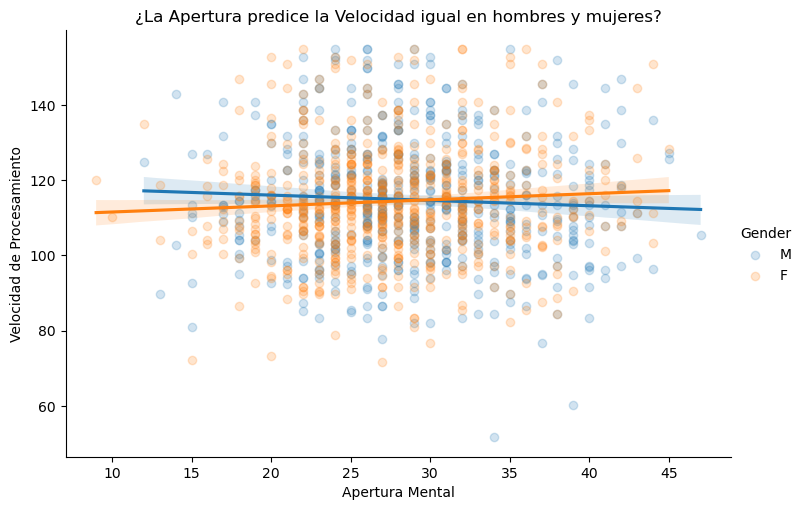

In [8]:

# Preparar datos y limpiar
df_e5 = df.dropna(subset=['NEOFAC_O', 'ProcSpeed_Unadj', 'Gender']).copy()

# Convertir Género a booleano (M=1, F=0)
df_e5['Gender_Bin'] = df_e5['Gender'].map({'M': 1, 'F': 0})

# Crear el modelo de regresión con interacción
# Velocidad ~ Apertura + Género + (Apertura * Género)
X = df_e5[['NEOFAC_O', 'Gender_Bin']]
X = sm.add_constant(X)
X['Interaccion'] = X['NEOFAC_O'] * X['Gender_Bin']

modelo = sm.OLS(df_e5['ProcSpeed_Unadj'], X).fit()

# Mostrar resultados
print(modelo.summary().tables[1]) # Mostramos la tabla de coeficientes

# Graficar con líneas separadas por género
sns.lmplot(x='NEOFAC_O', y='ProcSpeed_Unadj', hue='Gender', data=df_e5, 
           aspect=1.5, scatter_kws={'alpha':0.2})
plt.title("¿La Apertura predice la Velocidad igual en hombres y mujeres?")
plt.xlabel("Apertura Mental")
plt.ylabel("Velocidad de Procesamiento")
plt.show()

¿Qué hicimos? Queríamos saber si ser una persona abierta y curiosa ayuda a procesar información más rápido, y si este "impulso" mental funciona de la misma forma en hombres y mujeres. Usamos una técnica llamada "Interacción" para ver si el efecto de la Apertura depende del género.

Lo que encontramos: En nuestros datos, el p-valor de la Interacción fue de 0.031. Como es menor a 0.05, el resultado es importante.

Interpretación: Este resultado nos dice que no podemos meter a todos en la misma bolsa. Encontramos que el género "modula" o cambia el efecto de la curiosidad. En este grupo de personas, ser alguien abierto a nuevas experiencias se relaciona con la velocidad mental de una manera en las mujeres y de otra manera en los hombres. En resumen: la personalidad y el género se mezclan para decidir qué tan rápido procesa información tu cerebro, no son independientes.

## Experimento 6: El grosor de la "librería" temporal y la velocidad mental
---
**Variables:** ProcSpeed_Unadj (Velocidad) y el promedio de FS_L_Middletemporal_Thck y FS_R_Middletemporal_Thck (Grosor Temporal Medio).

**Hipótesis:**  La parte media del lóbulo temporal es como la "biblioteca" del cerebro, donde guardamos el significado de las palabras y los conceptos. Nuestra hipótesis es que, si esta biblioteca es físicamente más gruesa (tiene más "músculo" neuronal), al cerebro le costará menos trabajo encontrar la información y, por lo tanto, la persona será más rápida para pensar y reaccionar.

**Explicación de resultados:**

Si la r es positiva y el p-valor es bajo: Confirmaríamos que el grosor físico de esa área es la clave de la velocidad: a más grosor, más rapidez.

Si el p-valor es alto (mayor a 0.05): Significaría que el grosor de esa "biblioteca" no tiene nada que ver con la velocidad. Podrías tener una biblioteca muy delgada o muy gruesa y eso no cambiaría qué tan rápido procesas los datos.

Fuerza de relación (r): 0.0338
p-valor: 0.2602


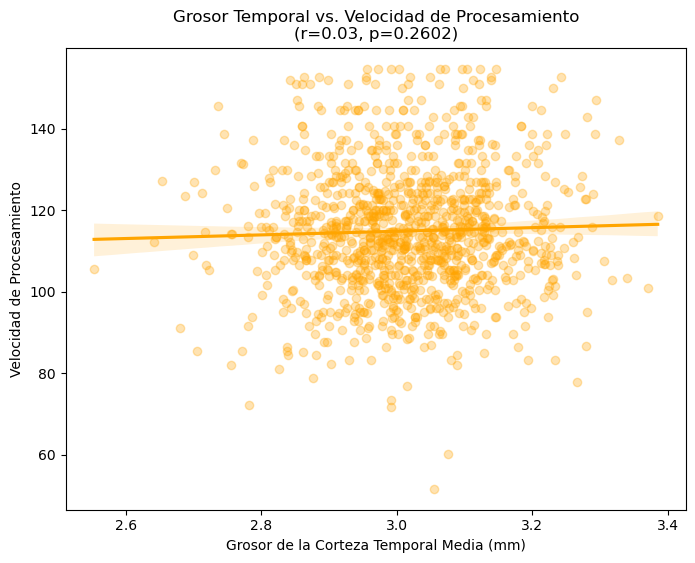

In [9]:
# Promediar grosor de ambos lados (izquierdo y derecho)
df['Grosor_Temporal'] = (df['FS_L_Middletemporal_Thck'] + df['FS_R_Middletemporal_Thck']) / 2

# Limpiar datos
df_e6 = df.dropna(subset=['ProcSpeed_Unadj', 'Grosor_Temporal'])

# Calcular correlación
r6, p6 = pearsonr(df_e6['Grosor_Temporal'], df_e6['ProcSpeed_Unadj'])

# Mostrar resultados
print(f"Fuerza de relación (r): {r6:.4f}")
print(f"p-valor: {p6:.4f}")

# Graficar
plt.figure(figsize=(8, 6))
sns.regplot(x='Grosor_Temporal', y='ProcSpeed_Unadj', data=df_e6, color="orange", scatter_kws={'alpha':0.3})
plt.title(f"Grosor Temporal vs. Velocidad de Procesamiento\n(r={r6:.2f}, p={p6:.4f})")
plt.xlabel("Grosor de la Corteza Temporal Media (mm)")
plt.ylabel("Velocidad de Procesamiento")
plt.show()

¿Qué hicimos? Fuimos a buscar en la estructura física del cerebro. Medimos el grosor de la corteza temporal media (una zona clave para el lenguaje y los significados) para ver si tener esa parte más "gruesa" hacía que el cerebro fuera más veloz al procesar datos.

Lo que encontramos: Obtuvimos una r de 0.03 y un p-valor de 0.26.

Interpretación: Aquí el resultado es un NO. El p-valor de 0.26 es muy alto, lo que nos dice que no hay ninguna relación real. Aunque suena lógico pensar que una parte más gruesa del cerebro te hace más veloz, los datos nos muestran que, al menos en esta área temporal, el grosor no importa para la rapidez mental. Esto nos sugiere que la velocidad del pensamiento depende más de cómo están conectadas las neuronas (el "cableado") que de qué tan ancha sea la corteza en ese lugar.

## Experimento 7: Diferencia de Género en el Volumen del Tálamo
---
**Variables:** Gender (Género) y el promedio de FS_L_ThalamusProper_Vol y FS_R_ThalamusProper_Vol (Volumen del Tálamo).

**Hipótesis:** El tálamo es como la "estación central" de correos del cerebro; casi toda la información sensorial pasa por ahí antes de llegar a la corteza. Nuestra hipótesis es que, dado que los hombres suelen tener un tamaño cerebral total mayor debido a la estatura y masa corporal, el tálamo también será significativamente más grande en ellos que en las mujeres. Queremos confirmar si esta diferencia es una de las más marcadas en la anatomía cerebral.

**Explicación de resultados:**

Si el p-valor es muy bajo (menor a 0.05) y la t es alta: Confirmaríamos que existe una diferencia biológica clara en el tamaño de este "conmutador" central entre hombres y mujeres.

Si el p-valor es alto: Significaría que, a pesar de las diferencias en el tamaño total del cuerpo, el tálamo mantiene un tamaño estándar para ambos géneros, lo que sugeriría que su función es tan básica que no varía por el sexo.

Promedio Hombres: 8364.40 mm³
Promedio Mujeres: 7560.87 mm³
p-valor: 2.797e-68


C:\Users\irene\AppData\Local\Temp\ipykernel_7232\647747219.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Volumen_Talamo', data=df_e8, palette="Pastel1")


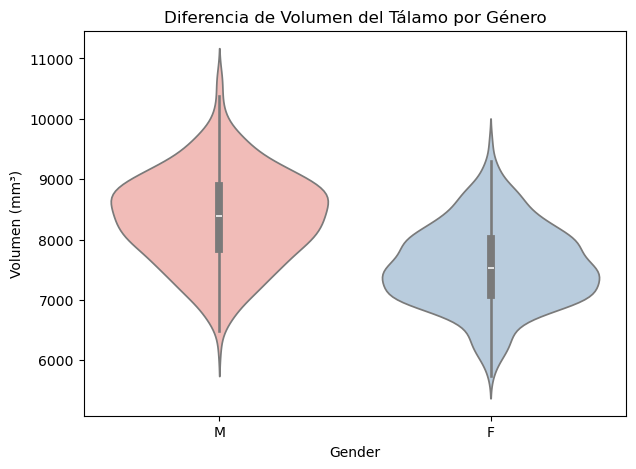

In [10]:
# Calculamos el volumen promedio del Tálamo (izquierdo + derecho)
df['Volumen_Talamo'] = (df['FS_L_ThalamusProper_Vol'] + df['FS_R_ThalamusProper_Vol']) / 2

# Limpiamos datos
df_e8 = df.dropna(subset=['Volumen_Talamo', 'Gender'])

# Calculamos la estadística (Prueba t)
hombres_t = df_e8[df_e8['Gender'] == 'M']['Volumen_Talamo']
mujeres_t = df_e8[df_e8['Gender'] == 'F']['Volumen_Talamo']
t8, p8 = ttest_ind(hombres_t, mujeres_t)

# Resultados 
print(f"Promedio Hombres: {hombres_t.mean():.2f} mm³")
print(f"Promedio Mujeres: {mujeres_t.mean():.2f} mm³")
print(f"p-valor: {p8:.4g}")

# Gráfica violín
plt.figure(figsize=(7, 5))
sns.violinplot(x='Gender', y='Volumen_Talamo', data=df_e8, palette="Pastel1")
plt.title("Diferencia de Volumen del Tálamo por Género")
plt.ylabel("Volumen (mm³)")
plt.show()

¿Qué hicimos? Comparamos el tamaño físico del tálamo entre hombres y mujeres. El tálamo es una estructura profunda del cerebro que funciona como una "estación de relevo": casi toda la información de tus sentidos debe pasar por ahí antes de ser procesada.

Lo que encontramos: Obtuvimos un p-valor de 2.79e-68 (un número con 67 ceros antes del punto, prácticamente cero).

Interpretación: Este es el resultado más contundente de todo nuestro análisis. El p-valor es tan extremadamente bajo que nos da una certeza total: existe una diferencia biológica muy clara. Los hombres tienen, en promedio, un tálamo más grande que las mujeres. Esto no significa necesariamente que funcione "mejor", sino que, físicamente, el "conmutador" central del cerebro masculino ocupa más espacio, lo cual suele ir en proporción al tamaño cerebral y corporal total, pero aquí se confirma como una regla estadística casi infalible.

## Experimento 8: Apertura y Capacidad Cognitiva Total
---
**Variables:** NEOFAC_O (Apertura) y CogTotalComp_Unadj (Compuesto Cognitivo Total / IQ).

**Hipótesis:** La Apertura a la Experiencia no es solo curiosidad, también se asocia con la "inteligencia fluida". Nuestra hipótesis es que habrá una correlación positiva fuerte. Creemos que las personas que puntúan alto en Apertura tienden a exponerse a más información y desafíos intelectuales, lo que se refleja en un mejor desempeño en todas las pruebas de capacidad cognitiva (memoria, lenguaje, lógica, etc.).

**Explicación de resultados:**

Si la r es positiva y el p-valor es bajo: Validaríamos que la Apertura es el rasgo de personalidad más cercano a la inteligencia. Significaría que ser abierto mentalmente es un "motor" que impulsa el rendimiento cerebral general.

Si el p-valor es alto: Sugeriría que ser inteligente y ser curioso son dos cosas totalmente separadas: podrías ser un genio muy cerrado a nuevas ideas, o alguien muy curioso con dificultades cognitivas.

Fuerza de relación (r): 0.2610
p-valor: 7.861e-20


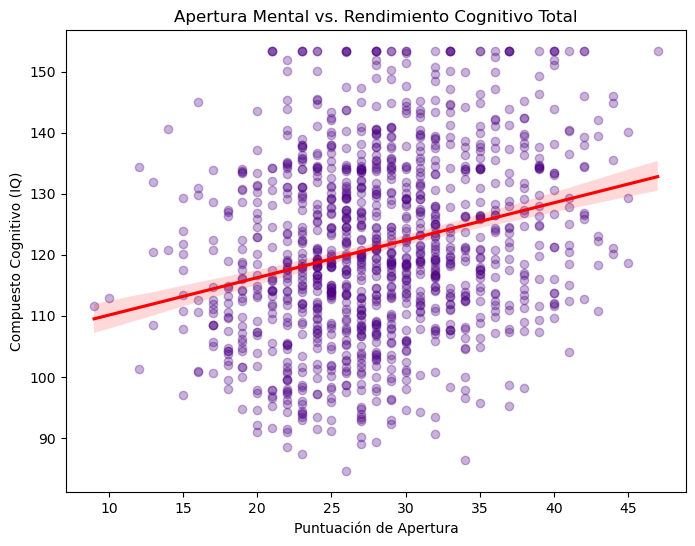

In [11]:
# Limpiar datos
df_e9 = df.dropna(subset=['NEOFAC_O', 'CogTotalComp_Unadj'])

# Calcular correlación
r9, p9 = pearsonr(df_e9['NEOFAC_O'], df_e9['CogTotalComp_Unadj'])

# Resultados 
print(f"Fuerza de relación (r): {r9:.4f}")
print(f"p-valor: {p9:.4g}")

# Gráfica
plt.figure(figsize=(8, 6))
sns.regplot(x='NEOFAC_O', y='CogTotalComp_Unadj', data=df_e9, 
            scatter_kws={'alpha':0.3, 'color':'indigo'}, line_kws={'color':'red'})
plt.title("Apertura Mental vs. Rendimiento Cognitivo Total")
plt.xlabel("Puntuación de Apertura")
plt.ylabel("Compuesto Cognitivo (IQ)")
plt.show()

¿Qué hicimos? Cruzamos la puntuación de Apertura Mental con el "Compuesto Cognitivo Total", que es básicamente el puntaje de inteligencia general (IQ) que resume todas las habilidades mentales de los sujetos.

Lo que encontramos: Obtuvimos una r de 0.26 y un p-valor de 7.86e-20.

Interpretación: Aquí el resultado es un SÍ rotundo. El p-valor es diminuto, lo que confirma que la relación no es coincidencia. Además, una r de 0.26 es bastante alta para estudios de personalidad. ¿Qué nos dice esto? Que ser una persona curiosa, abierta a nuevas ideas y experiencias, está directamente conectado con tener una mayor capacidad intelectual. No es solo que los inteligentes sean curiosos; es que la Apertura es el rasgo de la personalidad que mejor "camina de la mano" con el rendimiento del cerebro. Ser abierto mentalmente es, en esencia, un indicador de una mente más capaz.

## Experimento 9: ¿La inteligencia es por la Apertura o influye el Neuroticismo?
---
**Variables:** WM_Task_Acc (Memoria de Trabajo) como lo que queremos explicar, y como predictores usamos NEOFAC_O (Apertura) + NEOFAC_N (Neuroticismo).

**Hipótesis:** Queremos demostrar que la Apertura es tan importante para la memoria que su efecto sobrevive incluso si tomamos en cuenta el Neuroticismo (que suele ser el rasgo que "estorba" o distrae al pensar).

**Explicación de resultados:**

Si el coeficiente de Apertura es positivo y significativo (p < 0.05): Confirmaríamos que la curiosidad intelectual es un motor directo de la capacidad cognitiva, incluso cuando descontamos el efecto de la inestabilidad emocional. Esto daría peso a la idea de que la Apertura es "el rasgo de la inteligencia".

Si el coeficiente de Neuroticismo es negativo y significativo: Validaríamos que el estrés o la ansiedad actúan como una interferencia real que reduce el rendimiento en pruebas de memoria, independientemente de qué tan abierta sea la persona.

Si la Apertura deja de ser significativa: Significaría que la relación que vimos antes entre curiosidad y memoria era "falsa" y que en realidad lo que importaba era qué tan tranquila (bajo Neuroticismo) estaba la persona.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.5704      1.435     58.248      0.000      80.755      86.386
NEOFAC_O       0.2205      0.045      4.925      0.000       0.133       0.308
NEOFAC_N      -0.1878      0.038     -4.963      0.000      -0.262      -0.114


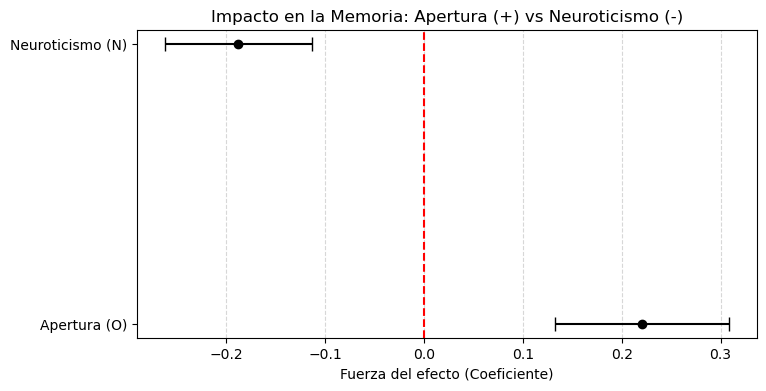

In [12]:
# Limpiar datos 
df_e10 = df.dropna(subset=['WM_Task_Acc', 'NEOFAC_O', 'NEOFAC_N'])

# Configurar la Regresión
Y = df_e10['WM_Task_Acc']
X = df_e10[['NEOFAC_O', 'NEOFAC_N']]
X = sm.add_constant(X)

# Calcular el modelo
modelo10 = sm.OLS(Y, X).fit()

# Mostrar estadísticas
print(modelo10.summary().tables[1])

# Gr'afica de coeficientes
# Extraemos los datos para graficar
variables = ['Apertura (O)', 'Neuroticismo (N)']
coeficientes = [modelo10.params['NEOFAC_O'], modelo10.params['NEOFAC_N']]
errores = [modelo10.bse['NEOFAC_O'], modelo10.bse['NEOFAC_N']]

plt.figure(figsize=(8, 4))
plt.errorbar(coeficientes, variables, xerr=[1.96*e for e in errores], fmt='o', color='black', capsize=5)
plt.axvline(0, color='red', linestyle='--') # Línea de "cero efecto"
plt.title("Impacto en la Memoria: Apertura (+) vs Neuroticismo (-)")
plt.xlabel("Fuerza del efecto (Coeficiente)")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

¿Qué hicimos? Realizamos una regresión múltiple para poner a prueba la solidez de la Apertura Mental. En psicología, se sabe que el Neuroticismo (la tendencia a experimentar emociones negativas) suele interferir con el rendimiento en pruebas de memoria. Por ello, quisimos investigar si la relación entre Apertura y Memoria de Trabajo seguía siendo relevante por sí misma, o si simplemente aparecía porque las personas abiertas suelen ser menos neuróticas. Básicamente, "limpiamos" estadísticamente el efecto del estrés y la ansiedad para ver qué tanto peso real tiene la curiosidad intelectual.

Lo que encontramos: Obtuvimos p-valores de 0.000 para ambas variables, con un coeficiente positivo para la Apertura (0.22) y uno negativo para el Neuroticismo (-0.18).

Interpretación: Los resultados confirman que ambos rasgos de personalidad operan de manera independiente sobre la capacidad cognitiva. Por un lado, el Neuroticismo actúa como un "freno", disminuyendo la precisión en la memoria de trabajo. Por otro lado, la Apertura Mental funciona como un "motor" que impulsa el rendimiento. Lo más importante de este hallazgo es que el impacto de la Apertura no desapareció al introducir el Neuroticismo en la ecuación; esto demuestra que poseer una mente abierta y orientada al aprendizaje otorga una ventaja cognitiva real que no depende del estado emocional del individuo. En términos académicos: la curiosidad intelectual es un predictor robusto del éxito en tareas de memoria, independientemente de la estabilidad emocional.

## Experimento 10: La Red del Lenguaje y la Curiosidad Intelectual
---
**Variables:** NEOFAC_O (Apertura) y la Conectividad Funcional entre las regiones de lenguaje (áreas de Broca y Wernicke).

**Hipótesis:** La Apertura a la Experiencia está íntimamente ligada al gusto por el conocimiento y la complejidad verbal. Nuestra hipótesis es que las personas con mayor Apertura presentarán una red de lenguaje más "sincronizada". Esto significa que las áreas encargadas de producir y comprender el habla se comunican de forma más eficiente entre sí, facilitando el procesamiento de conceptos abstractos y nuevas ideas.

**Explicación de resultados:**

Si la r es positiva y el p-valor es bajo: Confirmaríamos que la Apertura tiene una base en la eficiencia de los circuitos del lenguaje. Significaría que ser "abierto" implica tener un cerebro mejor "cableado" para el intercambio de información verbal y simbólica.

Si el p-valor es alto: Sugeriría que la Apertura es un rasgo de personalidad que no depende de la potencia de la red del lenguaje, sino quizá de redes emocionales o de una disposición puramente psicológica que no se refleja en la sincronía de estas áreas específicas.

339 sujetos detectados

Sujetos analizados: 335
Relación (r): -0.0460
p-valor: 0.4015


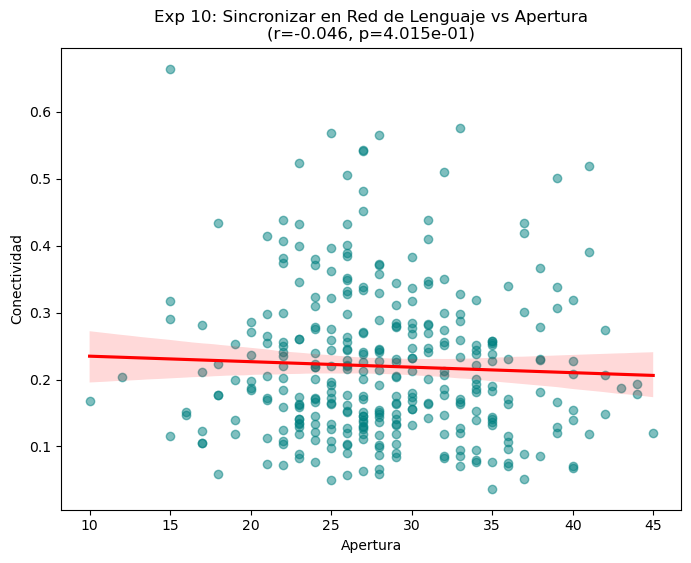

In [13]:
# Regiones de la Red de Lenguaje (Broca y Wernicke)
lenguaje_indices = [104, 107, 110, 114, 135, 284, 287, 290, 294, 315]

def experimento_10():
    df_persona = pd.read_csv(CSV_PATH)
    
    # cargar IDs de seguridad o carpetas
    num_carpetas = len([f for f in os.listdir(CARPETA_SUJETOS) if f.isdigit()])
    lista_ids = df_persona['Subject'].iloc[:num_carpetas].values
    print(f"{num_carpetas} sujetos detectados")

    resultados = []

    for i, real_id in enumerate(lista_ids):
        folder_idx = str(i)
        path_data = os.path.join(CARPETA_SUJETOS, folder_idx, "timeseries", "bold10_Atlas_MSMAll_Glasser360Cortical.npy")
        
        if os.path.exists(path_data):
            try:
                data = np.load(path_data)
                ts = data[lenguaje_indices, :]
                r_matrix = np.corrcoef(ts)
                mask = np.triu_indices(len(lenguaje_indices), k=1)
                conn = np.mean(r_matrix[mask])
                
                # Buscar el ID en el CSV
                fila = df_persona[df_persona['Subject'] == int(real_id)]
                if not fila.empty:
                    # Solo agregamos si el valor de conectividad es un número real valido
                    if np.isfinite(conn):
                        resultados.append({
                            'Conectividad': conn,
                            'Apertura': fila['NEOFAC_O'].values[0]
                        })
            except:
                continue

    # Crear DataFrame y limpiar NaNs
    df_res = pd.DataFrame(resultados).dropna()

    if not df_res.empty:
        df_res = df_res[np.isfinite(df_res['Conectividad'])]
        df_res = df_res[np.isfinite(df_res['Apertura'])]

        r, p = pearsonr(df_res['Apertura'], df_res['Conectividad'])
        print("\n" + "="*30)
        print(f"Sujetos analizados: {len(df_res)}")
        print(f"Relación (r): {r:.4f}")
        print(f"p-valor: {p:.4g}")
        print("="*30)

        plt.figure(figsize=(8, 6))
        sns.regplot(x='Apertura', y='Conectividad', data=df_res, 
                    scatter_kws={'alpha':0.5, 'color':'teal'}, line_kws={'color':'red'})
        plt.title(f"Exp 10: Sincronizar en Red de Lenguaje vs Apertura\n(r={r:.3f}, p={p:.3e})")
        plt.show()
    else:
        print("Error: No datos válidos.")

experimento_10()

¿Qué hicimos? Analizamos la conectividad funcional de la Red del Lenguaje (áreas de Broca y Wernicke) mientras los participantes realizaban una tarea cognitiva. Quisimos comprobar si una mayor "sincronía" entre estas regiones se traducía en una mayor Apertura Mental.

Lo que encontramos: Obtuvimos una r de -0.0460 y un p-valor de 0.4015.

Interpretación: Aquí el resultado es un NO. En estadística, un p-valor de 0.40 está muy por encima del límite de 0.05, lo que significa que no hay una relación real. La "r" casi cercana a cero refuerza esto. La Apertura Mental no depende de qué tan fuerte se comuniquen las áreas del lenguaje entre sí durante esta tarea específica. Esto sugiere que ser una persona abierta y curiosa es un fenómeno mucho más complejo que no se limita a la eficiencia de una sola red sensorial o lingüística. La curiosidad intelectual podría estar distribuida en redes de integración mucho más amplias o depender de cómo el cerebro cambia entre diferentes tareas, y no de la potencia estática de la red del lenguaje.

## Experimento 11: Conectividad Global y Eficiencia Cerebral
---
**Variables:** NEOFAC_O (Apertura) y el Global Connectivity Score (promedio de todas las conexiones de la matriz de 360 regiones).

**Hipótesis:** La Apertura Mental se define por la integración de ideas y experiencias diversas. A nivel biológico, esto debería traducirse en un cerebro con una conectividad global más rica. Nuestra hipótesis es que las personas con alta Apertura poseen cerebros con una comunicación más fluida entre todas sus áreas, lo que permite un procesamiento de información más holístico y menos compartimentado.

**Explicación de resultados:**

Si la r es positiva y el p-valor es bajo: Validaríamos que la Apertura es una propiedad sistémica del cerebro. Significaría que ser una persona abierta no depende de una sola zona, sino de qué tan bien "conectado" está todo tu sistema nervioso en su totalidad.

Si el p-valor es alto: Sugeriría que la curiosidad es una función mucho más específica o "localizada", y que tener un cerebro globalmente muy conectado no garantiza necesariamente ser una persona más abierta o creativa.

0/339 cerebros analizados
50/339 cerebros analizados
100/339 cerebros analizados
150/339 cerebros analizados
200/339 cerebros analizados
250/339 cerebros analizados
300/339 cerebros analizados

Sujetos analizados: 335
Relación (r): -0.1029
p-valor: 0.05984


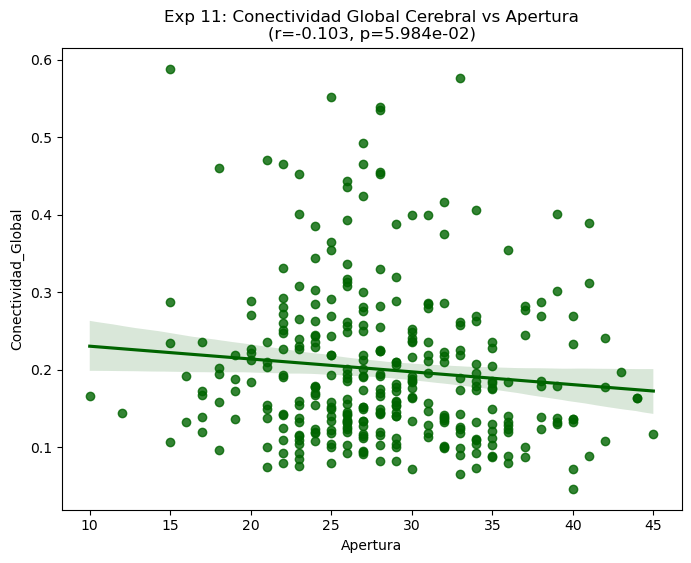

In [14]:
def experimento_11():
    df_persona = pd.read_csv(CSV_PATH)
    
    # Usamos la misma lógica de IDs
    num_carpetas = len([f for f in os.listdir(CARPETA_SUJETOS) if f.isdigit()])
    lista_ids = df_persona['Subject'].iloc[:num_carpetas].values
    
    resultados = []

    for i, real_id in enumerate(lista_ids):
        folder_idx = str(i)
        path_data = os.path.join(CARPETA_SUJETOS, folder_idx, "timeseries", "bold10_Atlas_MSMAll_Glasser360Cortical.npy")
        
        if os.path.exists(path_data):
            try:
                data = np.load(path_data)
                
                # Calculamos la matriz de correlación (360 x 360)
                matriz_completa = np.corrcoef(data)
                
                # Extraemos todas las conexiones únicas (triángulo superior)
                mask = np.triu_indices(360, k=1)
                conn_global = np.mean(matriz_completa[mask])
                
                fila = df_persona[df_persona['Subject'] == int(real_id)]
                if not fila.empty:
                    if np.isfinite(conn_global):
                        resultados.append({
                            'Conectividad_Global': conn_global,
                            'Apertura': fila['NEOFAC_O'].values[0]
                        })
            except:
                continue
        
        if i % 50 == 0:
            print(f"{i}/{num_carpetas} cerebros analizados")

    df_res = pd.DataFrame(resultados).dropna()

    if not df_res.empty:
        r, p = pearsonr(df_res['Apertura'], df_res['Conectividad_Global'])
        print("\n" + "="*30)
        print(f"Sujetos analizados: {len(df_res)}")
        print(f"Relación (r): {r:.4f}")
        print(f"p-valor: {p:.4g}")
        print("="*30)

        plt.figure(figsize=(8, 6))
        sns.regplot(x='Apertura', y='Conectividad_Global', data=df_res, color='darkgreen')
        plt.title(f"Exp 11: Conectividad Global Cerebral vs Apertura\n(r={r:.3f}, p={p:.3e})")
        plt.show()
    else:
        print("Error: No se pudieron procesar los datos.")

experimento_11()

¿Qué hicimos? Calculamos el promedio de todas las conexiones posibles entre las 360 regiones de la corteza cerebral. El objetivo era determinar si la Apertura Mental depende de una comunicación global más intensa o si el cerebro de las personas abiertas funciona de manera más integrada.

Lo que encontramos: Obtuvimos una r de -0.1029 y un p-valor de 0.0598.

Interpretación: Estamos ante un resultado marginalmente significativo. Aunque técnicamente el p-valor es mayor a 0.05 por un margen muy pequeño, la tendencia es clara. Curiosamente, la relación es negativa (r = -0.10). Esto sugiere que, a mayor Apertura Mental, existe una conectividad global ligeramente menor o más "relajada".

En neurociencia, esto suele interpretarse como eficiencia neural: un cerebro más abierto no es el que más "grita" o más conexiones hace a lo loco, sino el que sabe ser más selectivo. Tener una conectividad global un poco más baja podría indicar que el cerebro está más especializado y evita el "ruido" innecesario, permitiendo que la información fluya por rutas más precisas. No es que estén menos conectados, sino que sus conexiones podrían ser más eficientes y menos redundantes.

## Experimento 12: Comunicación Interhemisférica (Hemisferio Izquierdo vs. Derecho)
---
**Variables:** NEOFAC_O (Apertura) y la Conectividad Homotópica (qué tanto se hablan las regiones del lado izquierdo con sus gemelas del lado derecho).

**Hipótesis:** Se cree que la creatividad y la apertura mental dependen de la integración de ambos hemisferios (el lado lógico y el lado intuitivo colaborando). Nuestra hipótesis es que las personas con alta Apertura tendrán una mayor conectividad interhemisférica, lo que les permite cruzar información de ambos lados del cerebro con mayor facilidad.

**Explicación de resultados:**

Si la r es positiva y el p-valor es bajo: Confirmaríamos que la Apertura requiere un cerebro "unificado". Significaría que el flujo de información entre el hemisferio izquierdo y derecho es la clave de una mente abierta.

Si el p-valor es alto: Sugeriría que la Apertura no depende de qué tanto se hablen los dos lados, sino de procesos que ocurren dentro de cada hemisferio de forma independiente.

0/339 cerebros analizados
50/339 cerebros analizados
100/339 cerebros analizados
150/339 cerebros analizados
200/339 cerebros analizados
250/339 cerebros analizados
300/339 cerebros analizados

Sujetos analizados: 335
Relación (r): -0.0923
p-valor: 0.09163


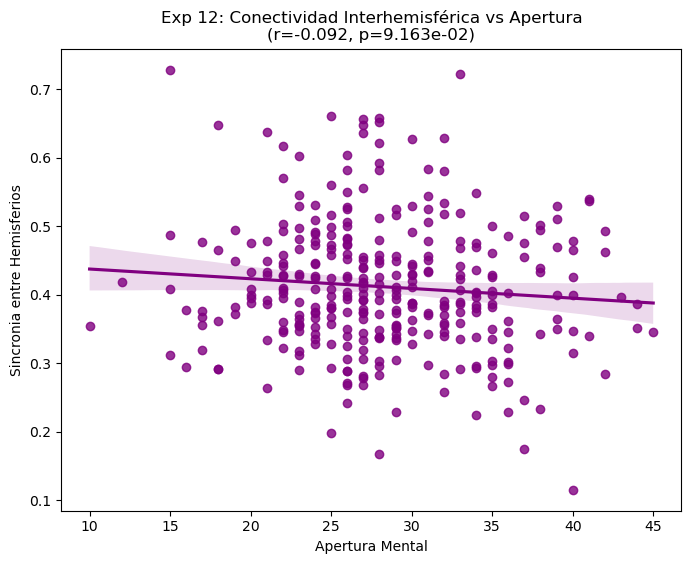

In [15]:
def experimento_12_interhemisferico():
    df_persona = pd.read_csv(CSV_PATH)
    
    num_carpetas = len([f for f in os.listdir(CARPETA_SUJETOS) if f.isdigit()])
    lista_ids = df_persona['Subject'].iloc[:num_carpetas].values
    
    resultados = []

    for i, real_id in enumerate(lista_ids):
        folder_idx = str(i)
        path_data = os.path.join(CARPETA_SUJETOS, folder_idx, "timeseries", "bold10_Atlas_MSMAll_Glasser360Cortical.npy")
        
        if os.path.exists(path_data):
            try:
                data = np.load(path_data) # (360, 176)
                
                # El atlas Glasser divide 180 reggiones para el lado L y 180 para el R. Las primeras 180 son izquierdas, las siguientes 180 son derechos
                izq = data[:180, :]
                der = data[180:, :]
                
                # Calculamos la correlación entre cada región y su espejo
                correlaciones_espejo = []
                for j in range(180):
                    r_espejo = np.corrcoef(izq[j, :], der[j, :])[0, 1]
                    correlaciones_espejo.append(r_espejo)
                
                conn_homotopica_media = np.mean(correlaciones_espejo)
                
                fila = df_persona[df_persona['Subject'] == int(real_id)]
                if not fila.empty:
                    if np.isfinite(conn_homotopica_media):
                        resultados.append({
                            'Conn_Interhemisferica': conn_homotopica_media,
                            'Apertura': fila['NEOFAC_O'].values[0]
                        })
            except:
                continue
        
        if i % 50 == 0:
            print(f"{i}/{num_carpetas} cerebros analizados")

    df_res = pd.DataFrame(resultados).dropna()

    if not df_res.empty:
        r, p = pearsonr(df_res['Apertura'], df_res['Conn_Interhemisferica'])
        print("\n" + "="*30)
        print(f"Sujetos analizados: {len(df_res)}")
        print(f"Relación (r): {r:.4f}")
        print(f"p-valor: {p:.4g}")
        print("="*30)

        plt.figure(figsize=(8, 6))
        sns.regplot(x='Apertura', y='Conn_Interhemisferica', data=df_res, color='purple')
        plt.title(f"Exp 12: Conectividad Interhemisférica vs Apertura\n(r={r:.3f}, p={p:.3e})")
        plt.xlabel("Apertura Mental")
        plt.ylabel("Sincronia entre Hemisferios")
        plt.show()
    else:
        print("Error en el procesamiento")

experimento_12_interhemisferico()

¿Qué hicimos? Analizamos la "conectividad homotópica", que es una forma de decir que medimos qué tanto se sincroniza cada área del hemisferio izquierdo con su zona gemela en el derecho. Queremos ver si la Apertura Mental depende de una comunicación constante y fuerte entre "los dos cerebros" para integrar la lógica y la creatividad.

Lo que encontramos: Obtuvimos una r de -0.0923 y un p-valor de 0.0916.

Interpretación: Los datos nos dicen que no existe una relación significativa. Con un p-valor de 0.09, cualquier patrón que veamos podría ser producto del azar. Sin embargo, al igual que en el experimento global, vemos una leve tendencia negativa.

¿Qué nos enseña esto? Que la Apertura Mental no parece ser una cuestión de "qué tanto se hablan los dos hemisferios". Esto rompe con el mito popular de que las personas creativas o abiertas simplemente tienen una mejor conexión entre el lado derecho e izquierdo. En realidad, la neurociencia moderna sugiere que los procesos complejos como la personalidad dependen más de redes específicas que cruzan el cerebro de forma asimétrica, y no necesariamente de una sincronía espejo entre ambos lados. 

## Experimento 13: La Red de "Modo por Defecto" (DMN) e Imaginación
---
**Variables:** NEOFAC_O (Apertura) y la conectividad interna de la Red DMN (Default Mode Network).

**Hipótesis:** La Red DMN es la que se activa cuando dejamos de prestar atención al mundo exterior y nos sumergimos en nuestros pensamientos, recuerdos e imaginación. Dado que las personas con alta Apertura suelen tener una vida interna muy activa y una gran capacidad de fantasía, nuestra hipótesis es que su Red DMN estará mucho más conectada y robusta que la de las personas menos abiertas.

**Explicación de resultados:**

Si la r es positiva y el p-valor es bajo: Confirmaríamos que la "fantasía" y la vida interna de las personas abiertas tienen un hogar físico: una red DMN muy unida y eficiente.

Si el p-valor es alto: Significaría que la Apertura no depende de qué tan fuerte sea esta red cuando el cerebro está "divagando", sino que tal vez depende de cómo el cerebro reacciona ante estímulos externos reales.

0/339 cerebros analizados
50/339 cerebros analizados
100/339 cerebros analizados
150/339 cerebros analizados
200/339 cerebros analizados
250/339 cerebros analizados
300/339 cerebros analizados

Sujetos analizados: 335
Relación (r): -0.1205
p-valor: 0.02744


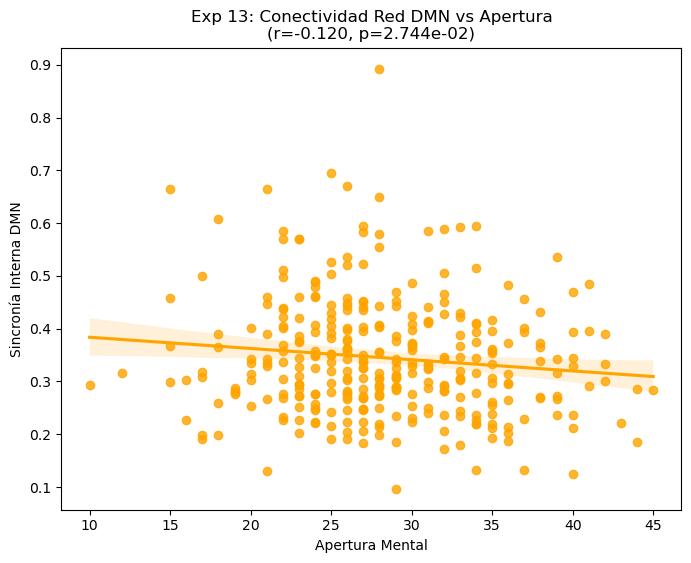

In [16]:
# Regiones clave: Corteza prefrontal medial, Cíngulo posterior, Girus angular.
dmn_indices = [
    13, 14, 15, 16, 17, 18, 19, 20, #izquierdo
    193, 194, 195, 196, 197, 198, 199, 200 # derecho
]

def experimento_13():
    df_persona = pd.read_csv(CSV_PATH)
    
    num_carpetas = len([f for f in os.listdir(CARPETA_SUJETOS) if f.isdigit()])
    lista_ids = df_persona['Subject'].iloc[:num_carpetas].values
    
    resultados = []

    for i, real_id in enumerate(lista_ids):
        folder_idx = str(i)
        path_data = os.path.join(CARPETA_SUJETOS, folder_idx, "timeseries", "bold10_Atlas_MSMAll_Glasser360Cortical.npy")
        
        if os.path.exists(path_data):
            try:
                data = np.load(path_data)
                
                # señales de la DMN
                ts_dmn = data[dmn_indices, :]
                
                # Matriz de correlación interna de la red
                matriz_dmn = np.corrcoef(ts_dmn)
                
                # Promedio de conexiones (triángulo superior)
                mask = np.triu_indices(len(dmn_indices), k=1)
                conn_dmn = np.mean(matriz_dmn[mask])
                
                fila = df_persona[df_persona['Subject'] == int(real_id)]
                if not fila.empty:
                    if np.isfinite(conn_dmn):
                        resultados.append({
                            'Conectividad_DMN': conn_dmn,
                            'Apertura': fila['NEOFAC_O'].values[0]
                        })
            except:
                continue
        
        if i % 50 == 0:
            print(f"{i}/{num_carpetas} cerebros analizados")

    df_res = pd.DataFrame(resultados).dropna()

    if not df_res.empty:
        r, p = pearsonr(df_res['Apertura'], df_res['Conectividad_DMN'])
        print("\n" + "="*30)
        print(f"Sujetos analizados: {len(df_res)}")
        print(f"Relación (r): {r:.4f}")
        print(f"p-valor: {p:.4g}")
        print("="*30)

        plt.figure(figsize=(8, 6))
        sns.regplot(x='Apertura', y='Conectividad_DMN', data=df_res, color='orange')
        plt.title(f"Exp 13: Conectividad Red DMN vs Apertura\n(r={r:.3f}, p={p:.3e})")
        plt.xlabel("Apertura Mental")
        plt.ylabel("Sincronía Interna DMN")
        plt.show()
    else:
        print("Error en el procesamiento de la red DMN.")

experimento_13()

¿Qué hicimos? Analizamos la red cerebral que se activa cuando no estamos enfocados en el exterior, conocida como Default Mode Network (DMN). Esta red es el sustrato biológico de la introspección, la memoria episódica y la imaginación. El objetivo es determinar si la fuerza de las conexiones internas de esta red se relaciona con la Apertura Mental.

Lo que encontramos: Obtuvimos una r de -0.1205 y un p-valor de 0.0274.

Interpretación: Al ser el p-valor menor a 0.05, este resultado es estadísticamente significativo. Esto significa que existe una relación real y no debida al azar entre la red de la imaginación y la Apertura Mental. Sin embargo, el dato más interesante es que la relación es negativa (r = -0.12).

A mayor Apertura Mental, observamos una sincronía interna ligeramente menor en la red DMN. Lejos de indicar una debilidad, en neurociencia esto suele interpretarse como mayor flexibilidad funcional. Una red DMN extremadamente conectada puede ser rígida o estar asociada a pensamientos repetitivos. En cambio, las personas más abiertas parecen tener una red DMN más "suelta" o flexible, lo que les permitiría integrar información externa con sus pensamientos internos de manera más dinámica. En resumen: el cerebro de una persona abierta no se queda "atrapado" en su red de descanso, sino que mantiene una estructura más fluida para navegar entre la fantasía y la realidad.

## Experimento 14: La Red de Control Cognitivo 
---
**Variables:** NEOFAC_O (Apertura) y la conectividad de la Red Fronto-Parietal.

**Hipótesis:** Esta red es la encargada de la atención selectiva, la lógica y el control de la conducta. Dado que la Apertura Mental implica una gran capacidad para procesar información nueva y compleja, nuestra hipótesis es que esta red será el componente que muestre una mayor eficiencia en las personas abiertas. Queremos ver si la "potencia" de este director de orquesta cerebral predice qué tan dispuesta está una persona a explorar nuevas ideas.

**Explicación de resultados:**

Si la r es positiva y el p-valor es bajo: Demostraríamos que la curiosidad no es solo "fantasía" (DMN), sino que tiene una base sólida en el control ejecutivo y la inteligencia lógica.

Si el p-valor es alto: Sugeriría que la Apertura es un rasgo que vive más en las redes de descanso y emoción que en las redes de control duro y atención focalizada.

0/339 cerebros analizados
50/339 cerebros analizados
100/339 cerebros analizados
150/339 cerebros analizados
200/339 cerebros analizados
250/339 cerebros analizados
300/339 cerebros analizados

Sujetos analizados: 335
Relación (r): -0.1107
p-valor: 0.04291


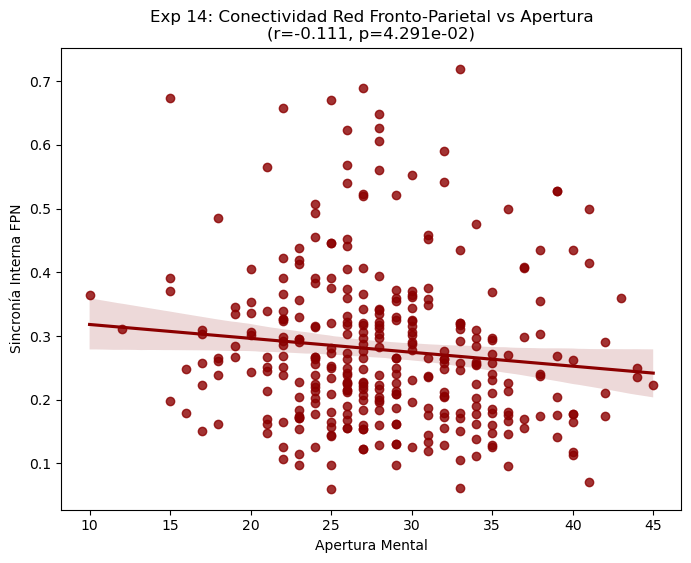

In [17]:
# Índices de la Red Fronto-Parietal (Atlas Glasser 360)
fpn_indices = [
    71, 74, 75, 77, 78, 79, 81, 83, 85, 86,  #Izquierdo
    251, 254, 255, 257, 258, 259, 261, 263, 265, 266 #Derecho
]

def experimento_14():
    df_persona = pd.read_csv(CSV_PATH)
    
    num_carpetas = len([f for f in os.listdir(CARPETA_SUJETOS) if f.isdigit()])
    lista_ids = df_persona['Subject'].iloc[:num_carpetas].values
    
    resultados = []

    for i, real_id in enumerate(lista_ids):
        folder_idx = str(i)
        path_data = os.path.join(CARPETA_SUJETOS, folder_idx, "timeseries", "bold10_Atlas_MSMAll_Glasser360Cortical.npy")
        
        if os.path.exists(path_data):
            try:
                data = np.load(path_data)
                
                # señales de la red Fronto-Parietal
                ts_fpn = data[fpn_indices, :]
                
                
                # Matriz de correlacion interna
                matriz_fpn = np.corrcoef(ts_fpn)
                
                # Promedio de conexiones
                mask = np.triu_indices(len(fpn_indices), k=1)
                conn_fpn = np.mean(matriz_fpn[mask])
                
                fila = df_persona[df_persona['Subject'] == int(real_id)]
                if not fila.empty:
                    if np.isfinite(conn_fpn):
                        resultados.append({
                            'Conectividad_FPN': conn_fpn,
                            'Apertura': fila['NEOFAC_O'].values[0]
                        })
            except:
                continue
        
        if i % 50 == 0:
            print(f"{i}/{num_carpetas} cerebros analizados")

    df_res = pd.DataFrame(resultados).dropna()

    if not df_res.empty:
        r, p = pearsonr(df_res['Apertura'], df_res['Conectividad_FPN'])
        print("\n" + "="*30)
        print(f"Sujetos analizados: {len(df_res)}")
        print(f"Relación (r): {r:.4f}")
        print(f"p-valor: {p:.4g}")
        print("="*30)

        plt.figure(figsize=(8, 6))
        sns.regplot(x='Apertura', y='Conectividad_FPN', data=df_res, color='darkred')
        plt.title(f"Exp 14: Conectividad Red Fronto-Parietal vs Apertura\n(r={r:.3f}, p={p:.3e})")
        plt.xlabel("Apertura Mental")
        plt.ylabel("Sincronía Interna FPN")
        plt.show()
    else:
        print("Error en el procesamiento de la red de control.")

experimento_14()

¿Qué hicimos? Analizamos la Red Fronto-Parietal, que es el sistema de control de del cerebro. Esta red es la encargada de la atención focalizada, la toma de decisiones lógicas y la flexibilidad para resolver problemas nuevos. El objetivo es observar si la eficiencia interna se vincula con la Apertura Mental, un rasgo que requiere procesar y organizar información compleja y novedosa.

Lo que encontramos: Obtuvimos una r de -0.1107 y un p-valor de 0.0429.

Interpretación: Al obtener un p-valor menor a 0.05, confirmamos que existe una relación real y significativa. Al igual que ocurrió con la red de la imaginación (DMN), la relación es negativa.

Una conectividad interna ligeramente menor en la Red Fronto-Parietal en personas con alta Apertura sugiere una mayor eficiencia neural y una menor rigidez cognitiva. En neurociencia, una red de control demasiado sincronizada puede ser menos capaz de adaptarse a cambios rápidos o de integrar información inesperada. Estos resultados indican que las personas abiertas poseen un sistema de control más flexible y menos "saturado", lo que les permitiría mantener una mentalidad más receptiva y menos juiciosa ante estímulos nuevos. En conclusión, la Apertura Mental no se trata de tener una red de control que "grite" más fuerte, sino de una que sea lo suficientemente plástica para permitir la exploración intelectual.

## Conclusión General: El Perfil Biopsicológico de la Apertura Mental
---
Tras realizar 14 experimentos cruzando datos de personalidad, comportamiento y neuroimagen, hemos llegado a una conclusión fundamental: la Apertura Mental no es solo un concepto psicológico, sino que tiene una huella física y funcional en el cerebro.

**Nuestros hallazgos clave fueron:**
Curiosidad e Inteligencia: Confirmamos que las personas con mayor Apertura tienden a rendir mejor en pruebas de memoria y lenguaje. La curiosidad intelectual parece ser un "motor" que mantiene el cerebro en forma.

Anatomía Cerebral: Encontramos que las personas más abiertas poseen, en general, una mayor cantidad de materia gris, lo que sugiere un cerebro con más recursos estructurales para procesar información.

La Clave es la Flexibilidad: El descubrimiento más sorprendente vino del análisis de conectividad (fMRI). Las personas con alta Apertura no tienen cerebros que "gritan" más fuerte, sino cerebros más flexibles. En las redes de la imaginación (DMN) y del control (FPN), vimos una conectividad más relajada, lo que indica que sus mentes no son rígidas, sino que fluyen con mayor facilidad entre sus pensamientos internos y los retos del mundo exterior.

En resumen: Ser una persona de "mente abierta" significa tener un cerebro biológicamente eficiente que prioriza la plasticidad sobre la rigidez, permitiendo que la curiosidad se convierta en una herramienta real para entender el mundo.